In [ ]:
import os
import matplotlib.pyplot as plt
from keras import models, layers
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
from keras.optimizers import RMSprop
from keras.utils import to_categorical
import cv2

ids = []
labels = []
train_data_paths = []
train_data = []

data_dir = r'/home/ubuntu/DeepLearningProject/data/human-protien-data'
print(os.path.exists(data_dir))

Using TensorFlow backend.


True


In [2]:
train_csv = os.path.join(data_dir,'train.csv')
with open(train_csv) as csv:
    content = csv.read()
    
print(content[:220])
lines = content.split('\n')
for index, line in enumerate(lines):
    if index==0:
        continue
    line_data = line.split(',')
    if not len(line_data)==2:
        continue
    id = line_data[0]
    label_arr = line_data[1]
    
    if  label_arr.__contains__(' '):
        label_split = label_arr.split(' ')
        for label in label_split:
            labels.append(label)
            ids.append(id)
    else:
        labels.append(label)
        ids.append(id)    

print('the length of labels: {}'.format(len(labels)))
print('the length of ids: {}'.format(len(ids)))


for i in ids:
    path_data = os.path.join(data_dir,'{}_green.png'.format(i))
    train_data_paths.append(path_data)

print(train_data_paths[:3])


Id,Target
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18
001bc
the length of labels: 50782
the length of ids: 50782
['/home/ubuntu/DeepLearningProject/data/human-protien-data/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_green.png', '/home/ubuntu/DeepLearningProject/data/human-protien-data/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_green.png', '/home/ubuntu/DeepLearningProject/data/human-protien-data/000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_green.png']


In [3]:
# plt.imshow(load_img(train_data_paths[0]))
# plt.show()

train_num = 10000
train_data_paths = train_data_paths[:train_num]
labels = labels[:train_num]

In [4]:
for index,data in enumerate(train_data_paths):
    img = cv2.imread(data)
    img = cv2.resize(img,(128,128))
    train_data.append(img_to_array(img)/255.0)
    if index == 20000: break
    if index % 1000 == 0:
        print('loading data, now {}'.format(index))
    
train_x = np.asarray(train_data,dtype='float32')
print('the shape of training data is {}'.format(train_x.shape))
labels = labels[:20001]
train_y = to_categorical(labels)
print('the length of training label is {}'.format(len(labels)))


loading data, now 0
loading data, now 1000
loading data, now 2000
loading data, now 3000
loading data, now 4000
loading data, now 5000
loading data, now 6000
loading data, now 7000
loading data, now 8000
loading data, now 9000
the shape of training data is (10000, 128, 128, 3)
the length of training label is 10000


In [5]:

model = models.Sequential()
model.add(layers.Conv2D(filters=32,
                        kernel_size=(3,3),
                        padding='valid',
                        activation='relu',
                        input_shape=(128,128,3)))
# model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(filters=64,
                      kernel_size= (3,3),
                       activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(filters=128,
                      kernel_size= (3,3),
                       activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(filters=128,
                      kernel_size= (3,3),
                       activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(units=64,activation='relu'))
model.add(layers.Dense(units=32,activation='relu'))
model.add(layers.Dense(units=28,activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 128)       0         
__________

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 33s 4ms/step - loss: 2.7157 - acc: 0.3450 - val_loss: 2.5090 - val_acc: 0.3790
Epoch 2/20
8000/8000 [==============================] - 24s 3ms/step - loss: 2.3570 - acc: 0.3646 - val_loss: 2.3844 - val_acc: 0.3655
Epoch 3/20
8000/8000 [==============================] - 24s 3ms/step - loss: 2.3017 - acc: 0.3630 - val_loss: 2.3156 - val_acc: 0.3780
Epoch 4/20
8000/8000 [==============================] - 24s 3ms/step - loss: 2.2927 - acc: 0.3626 - val_loss: 2.3704 - val_acc: 0.3555
Epoch 5/20
8000/8000 [==============================] - 24s 3ms/step - loss: 2.2851 - acc: 0.3655 - val_loss: 2.2870 - val_acc: 0.3770
Epoch 6/20
8000/8000 [==============================] - 24s 3ms/step - loss: 2.2768 - acc: 0.3625 - val_loss: 2.2959 - val_acc: 0.3780
Epoch 7/20
8000/8000 [==============================] - 24s 3ms/step - loss: 2.2614 - acc: 0.3648 - val_loss: 2.2867 - val_acc: 0.3785
Epoch 8

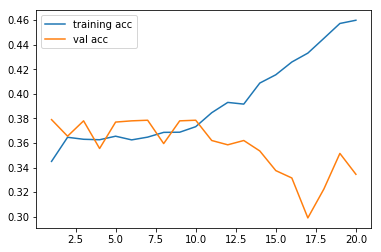

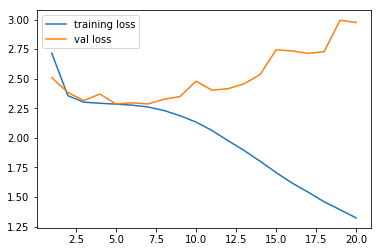

In [6]:
model.compile(optimizer=RMSprop(1e-3),
             loss='categorical_crossentropy',
             metrics=['acc'])

history = model.fit(x=train_x,
                    y=train_y,
                    batch_size=128,
                    epochs=20,
                    validation_split=0.2)

train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

enm = range(1,len(train_acc)+1)
plt.plot(enm,train_acc,label='training acc')
plt.plot(enm,val_acc,label='val acc')
plt.legend()
plt.figure()
plt.plot(enm,train_loss,label='training loss')
plt.plot(enm,val_loss,label='val loss')
plt.legend()
plt.show()
